# Discrete Cosine Transform
This is a little jupyter notebook that does a discrete cosine transform (DCT). DCT is a thing like the Fourier transform that's used in JPGs.

In [51]:
# Imports and the like
%pylab inline

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Graph settings. No more jet plz
mpl.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.92156863,  0.08235294,  0.72941176,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.54901961,  0.29019608,  0.2627451 ,
         1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.99607843,  0.15686275,  0.8745098 ,  0.16862745,
         0.8627451 ,  1.        ,  1.        ],
       [ 1.        ,  0.75294118,  0.00392157,  0.09019608,  0.02745098,
         0.4745098 ,  1.        ,  1.        ],
       [ 1.        ,  0.35686275,  0.6       ,  1.        ,  0.88235294,
         0.09803922,  0.98039216,  1.        ],
       [ 1.        ,  0.2627451 ,  0.90196078,  1.        ,  1.        ,
         0.29411765,  0.8745098 ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ]])

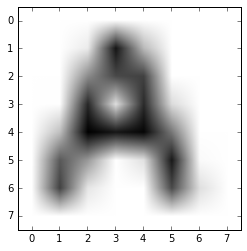

In [81]:
# Load up the image, and normalise it
img_path = '../assets/a.png'
# Open image. We also convert to grayscale to make it simpler to deal with
img = np.asarray(Image.open(img_path).convert('L'))
# Normalise to 0-1
img = img / 255

plt.imshow(img)
img

# Displaying the frequency things
Let's start with seeing if we can render each of the 'frequencies' that the DCT gives us.

In [55]:
freq = np.zeros((8, 8))
freq[0,0] = 1
freq

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

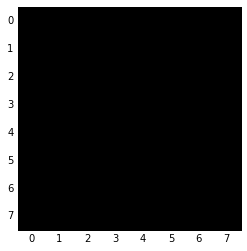

In [56]:
from scipy.fftpack import idct

freq_img = idct(idct(freq, axis=0), axis=1)
plt.imshow(freq_img)

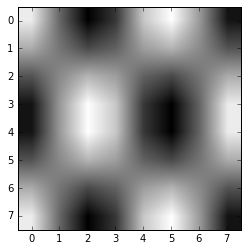

In [57]:
# Ok, lets try for a more interesting frequency
freq = np.zeros((8, 8))
freq[2,3] = 1
freq_img = idct(idct(freq, axis=0), axis=1)
plt.imshow(freq_img)

Alright sweet, that worked. (Side point: that plot looks wiggly haha)

Now lets try... ALL OF THEM

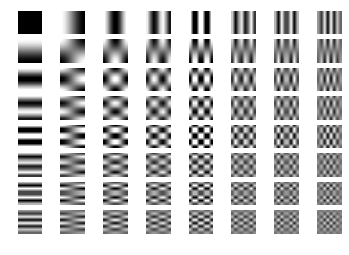

In [89]:
import itertools

fig, axes = plt.subplots(8, 8)

for (x, y) in itertools.product(range(8), range(8)):
    freq = np.zeros((8, 8))
    freq[x, y] = 1
    freq_img = idct(idct(freq, axis=0), axis=1)
    
    ax = axes[x, y]
    ax.imshow(freq_img)
    ax.axis('off')

Neato! That worked! :)

## Generating the things from an image

array([[  6.43676471e+00,  -2.67804573e-01,   1.14066855e+00,
          1.28416012e-01,   1.65196078e-01,   2.76328891e-01,
         -1.70577854e-01,   1.21208766e-02],
       [  1.35862306e-01,   5.87481881e-03,   3.52431981e-01,
          3.01222513e-01,  -6.82459017e-01,  -3.73353206e-01,
          1.59132959e-01,  -2.50116836e-01],
       [  9.84146150e-01,   1.76109941e-01,  -8.77287599e-01,
         -1.82194378e-01,  -5.80653053e-03,  -2.06642209e-01,
          3.10223718e-01,   4.79610215e-01],
       [ -2.13674319e-01,  -2.03986691e-02,  -2.04994939e-01,
         -2.32005457e-01,   5.74831191e-01,   2.41180524e-01,
         -1.72429322e-01,   4.04527918e-01],
       [  1.65196078e-01,   1.59533499e-02,   9.12904168e-02,
          1.45871539e-01,  -1.86764706e-01,  -4.44932490e-02,
         -1.80540936e-01,  -5.75197360e-01],
       [  1.88319103e-01,   3.92539127e-02,  -4.27105658e-01,
         -2.17986425e-01,   4.04082687e-01,   3.21360492e-01,
         -6.34915065e-02,  -1.8

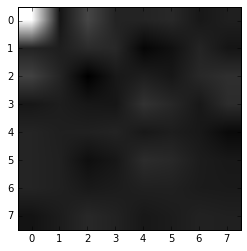

In [59]:
from scipy.fftpack import dct

freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')
plt.imshow(freqs)
freqs

seems correct...

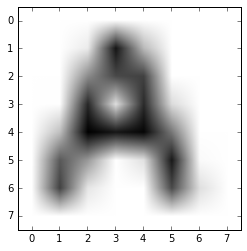

In [85]:
# Convert forward and backwards
freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')
reconstructed_img = idct(idct(freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
plt.imshow(reconstructed_img)

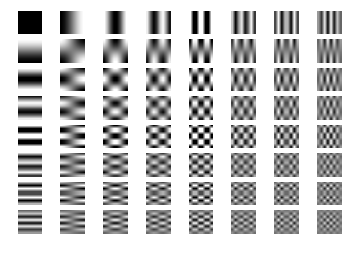

In [90]:
# Lets draw the compnents that come out
freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

fig, axes = plt.subplots(8, 8)

for (x, y) in itertools.product(range(8), range(8)):
    freq_select = np.zeros((8, 8))
    freq_select[x, y] = 1
    
    new_freqs = np.multiply(freqs, freq_select)
    
    freq_img = idct(idct(new_freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    ax = axes[x, y]
    ax.imshow(freq_img)
    ax.axis('off')

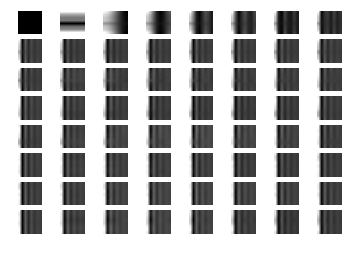

In [92]:
# Now lets draw the image being built up
# freqs = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')

fig, axes = plt.subplots(8, 8)

for (i, (x, y)) in enumerate(itertools.product(range(8), range(8))):
    freq_select = np.zeros(8 * 8)
    freq_select[:i] = 1
    freq_select = freq_select.reshape((8, 8))
    
    new_freqs = np.dot(freqs, freq_select)
    
    freq_img = idct(idct(new_freqs, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    ax = axes[x, y]
    ax.imshow(freq_img)
    ax.axis('off')